# Image SIFT / CNN features stuff

NLP work in progress is in separate notebook

In [1]:
import os
import sys
import json
import yaml

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/flipkart/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [4]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
import re

In [7]:
get_main_category = lambda example: re.findall("^.+?(?= >>|$)", example)[0]

df["main_product_category"] = df["product_category_tree"].apply(get_main_category)

In [8]:
df["main_product_category"].value_counts()

main_product_category
["Home Furnishing               150
["Baby Care                     150
["Watches                       150
["Home Decor & Festive Needs    150
["Kitchen & Dining              150
["Beauty and Personal Care      150
["Computers                     150
Name: count, dtype: int64

In [9]:
# !!!!!! ah the remove the [" O_o
df["main_product_category"] = df["main_product_category"].apply(lambda example: example[2:])

df["main_product_category"].value_counts()

main_product_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

# Open CV stuff and SIFT features


[https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)

## References / credit : following ressources lien

- tuto/webinaire OC : Weather firt analysis notebook


### Image info in dataframe

it is in the `image` column to get the JPG names

In [10]:
# get a CATEGORY2ID MAPPING
category2id = {k:v
                 for k,v in zip(
                     set(df["main_product_category"].unique()),
                     range(7)
                 )
                }

df["category_id"] = df["main_product_category"].apply(lambda x: category2id[x])

df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_product_category,category_id
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,2
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,3
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,3
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,2
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,2


In [35]:
from os import listdir

path = "/kaggle/input/flipkart/Flipkart/Images"

list_photos = [file.lstrip('0') for file in listdir(path)]

print(len(list_photos))

1050


# Show examples of each label

In [38]:
from matplotlib.image import imread


# changed "data" to "df" here and
# df['main_product_category']


def list_fct(name) :
    list_image_name = df[df['main_product_category'] == name]['image']
    return list(list_image_name)

In [25]:
df['main_product_category'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [26]:
"""
list_cloudy=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="cloudy"]
list_rain=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="rain"]
list_shine=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="shine"]
list_sunrise=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="sunrise"]
"""
list_home_furnishing = list(df[df['main_product_category'] == 'Home Furnishing']['image'])
list_baby_care = list(df[df['main_product_category'] == 'Baby Care']['image'])
list_watches = list(df[df['main_product_category'] == 'Watches']['image'])
list_home_decor = list(df[df['main_product_category'] == 'Home Decor & Festive Needs']['image'])
list_kitchen = list(df[df['main_product_category'] == 'Kitchen & Dining']['image'])
list_beauty = list(df[df['main_product_category'] == 'Beauty and Personal Care']['image'])
list_computers = list(df[df['main_product_category'] == 'Computers']['image'])

Home Furnishing


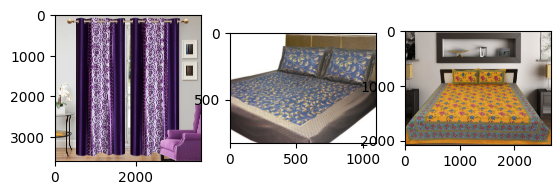

Baby Care


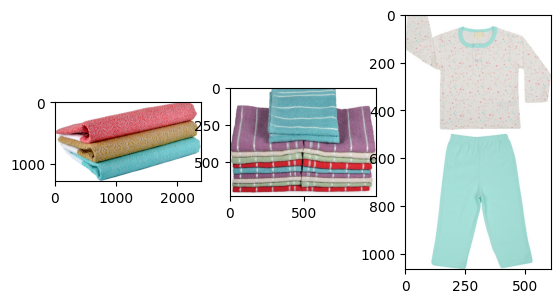

Watches


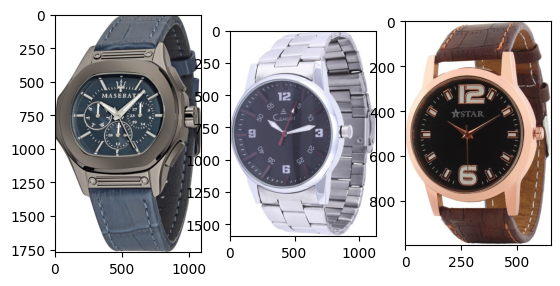

Home Decor & Festive Needs


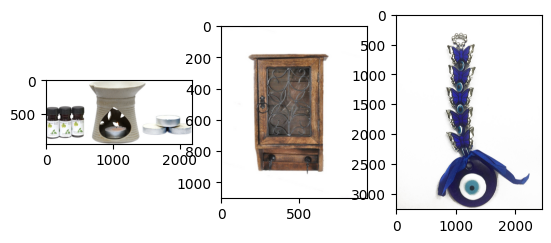

Kitchen & Dining


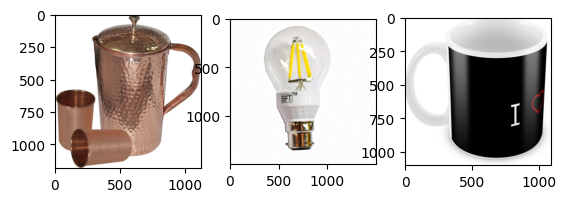

Beauty and Personal Care


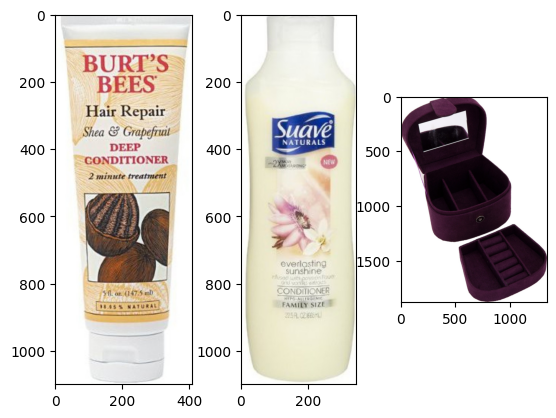

Computers


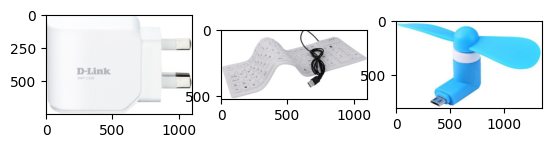

In [40]:
# "list labels" is the values possible for the product 
list_labels = list(df['main_product_category'].unique())

for name in list_labels:
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        #filename = path + list_fct(name)[i+10]
        filename = os.path.join(path, list_fct(name)[i])
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Example of SIFT features

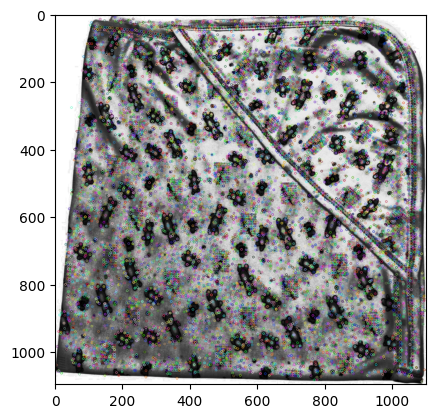

Descripteurs :  (15532, 128)

[[ 79. 139.   0. ...   0.   0.   0.]
 [  0.   0.   1. ...   0.   0.   1.]
 [ 39.   0.   0. ...   2.   2.   3.]
 ...
 [ 61.   1.   0. ...   0.   0.   1.]
 [ 57.   0.   0. ...   0.   9.   2.]
 [ 15.   3.   0. ...   0.   0.   1.]]


In [47]:
import cv2

#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create() # TODO: add number of features??

image = cv2.imread( os.path.join(path, list_photos[1]) , 0) # convert in gray


image = cv2.equalizeHist(image)   # equalize image histogram

kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

# SIFT preprocessing



In [55]:
# identification of key points and associated descriptors
import time


sift_keypoints = []
temps1=time.time()
#sift = cv2.xfeatures2d.SIFT_create(500)
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)):
    if image_num % 4 == 0:
        print(image_num)
    curr_img = os.path.join(path, list_photos[image_num])
    
    image = cv2.imread(curr_img, 0) # convert in gray
    try:
        #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        res = cv2.equalizeHist(image)   # equalize image histogram
        kp, des = sift.detectAndCompute(res, None)
        sift_keypoints.append(des)
    except Exception as e:
        print(e)
        print("CREATE DUMMY DESCRIPTION")
        des = np.zeros((1, 128))
        sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
4
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6202.266] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/9f9f9b420edea2f39c0dc3c24d5be07.jpg'): can't open/read file: check file path/integrity


8
12


[ WARN:0@6208.504] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/2127f52e96fb72c66bf081d25104ef8.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6209.220] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/991e8d8f884003ab18890971191085d.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
16
20
24
28
32
36
40
44
48
52


[ WARN:0@6230.264] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/50ea3acb555bf641e7ae9b4f3ba684a.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
56
60
64
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6233.263] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/c4718ae90f2889b7021a99ee1cc106c.jpg'): can't open/read file: check file path/integrity


68
72
76
80
84
88
92
96
100
104
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6250.063] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/32e812adcd11a38fd8b764891a852ff.jpg'): can't open/read file: check file path/integrity


108
112
116
120
124
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6266.484] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/906fd9cc604fbba05a502e01d763cd9.jpg'): can't open/read file: check file path/integrity


128
132
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6270.519] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/bb0f7b7a3075f4b9459121abe2185fa.jpg'): can't open/read file: check file path/integrity


136
140
144
148
152
156
160
164
168
172
176
180
184
188


[ WARN:0@6325.553] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/4f9ff160a1561e3656350f4bd6b8c50.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
192
196


[ WARN:0@6327.323] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/4f9f818e2d657b873b07578cfe2eade.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
200
204
208
212
216
220
224
228
232
236


[ WARN:0@6356.095] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/c70a580d96e50966130e2885d8c3505.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
240
244
248
252
256
260
264
268
272
276
280
284
288
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6386.553] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/e1e3861d54a8a17b7b91f04071a4ca3.jpg'): can't open/read file: check file path/integrity


292
296


[ WARN:0@6388.701] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/b852704f2002f8865a68818ad4951da.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
300
304
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6389.779] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/e966a5049a262cfc72e6bbf68b80e7.jpg'): can't open/read file: check file path/integrity


308
312
316
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6394.263] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/8e8af585235d7403ca2b7b56a51a6d4.jpg'): can't open/read file: check file path/integrity


320
324
328


[ WARN:0@6401.484] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/59493eeb88ebb4cc08d1522f3f87c3f.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
332
336
340
344
348
352
356
360
364
368
372


[ WARN:0@6417.392] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/2c63a087b298ec74042d557acf61be1.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6418.576] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/d3e1dc0d38be59e9927e47f152e48aa.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
376
380


[ WARN:0@6420.194] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/2a53d335775b652f22f41b529b9d646.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
384


[ WARN:0@6420.684] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/57836ecde71565f8ebdd576e41fdc96.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
388
392
396
400
404


[ WARN:0@6427.283] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/e73201f6d8807776e1d21c969078289.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
408
412
416
420
424
428
432
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6439.659] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/b8c4bc35aee94af356cb1fd2dfa0219.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6439.661] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/9099b1f6e1e8f893ec29a7023153c4.jpg'): can't open/read file: check file path/integrity


436
440
444
448
452
456


[ WARN:0@6451.147] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/f7a56876c61ba98dfed48ede5d3f3e1.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
460
464
468
472
476
480
484
488
492
496
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6471.667] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/8bdf59c9dcb241e3a57eb4f3729ec70.jpg'): can't open/read file: check file path/integrity


500
504
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6476.925] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/37c2402fee39fbc80433935711d1383.jpg'): can't open/read file: check file path/integrity


508
512
516
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6481.632] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/7f8bdc4372a73d0820507683a936b6e.jpg'): can't open/read file: check file path/integrity


520
524
528
532
536
540
544
548
552


[ WARN:0@6505.513] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/cbbc837d340fa163d11e169fbdb952.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
556
560


[ WARN:0@6507.831] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/96e89cc25a8b96fb9808716406fe94.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
564
568
572
576
580
584
588
592
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6526.118] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/20d2daba55a723128e4e07c0b0393a9.jpg'): can't open/read file: check file path/integrity


596


[ WARN:0@6527.232] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/6fdaa2b03d70da4358311d260456729.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
600
604
608


[ WARN:0@6532.399] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/37b39bef3db7ccd264c577a0edf0c0a.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
612
616
620
624
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6535.172] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/93097cfe5626f4ad8914e0a16a940b5.jpg'): can't open/read file: check file path/integrity


628
632
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6540.304] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/ae859a69c7608d8197c3ba8c37bc6ec.jpg'): can't open/read file: check file path/integrity


636
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6541.759] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/ddc40c08d9a9bafc4d14eddd98db7c0.jpg'): can't open/read file: check file path/integrity


640


[ WARN:0@6549.674] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/78b35be31e8ac99b0cbb817dab4c23f.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
644
648
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6550.821] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/abfcbe0e17dd50c4cf5fb1d6037d514.jpg'): can't open/read file: check file path/integrity


652


[ WARN:0@6552.416] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/59bc43e03e1824a9ab6466e32e5f137.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
656
660
664
668
672
676
680
684
688
692


[ WARN:0@6573.094] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/31c98cfde349d99fb6d5983f54c8751.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
696


[ WARN:0@6575.132] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/ec47240feda42c63e42f1e9cee60f7a.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6575.133] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/bff0eda7a6677dc1acb0477a1f7a121.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
700
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
704
708
712
716
720
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6587.791] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/1089dc3618a0ab7304d784ef400b83d.jpg'): can't open/read file: check file path/integrity


724
728
732
736
740


[ WARN:0@6601.004] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/87e83a2406dc98d941b8555356da477.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
744


[ WARN:0@6604.617] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/93bcad64d11c0aed903a8dd787ef069.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
748
752
756
760
764
768
772
776
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6620.543] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/79d049de21fb2426b516a8d2f9a8bdb.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
780


[ WARN:0@6621.640] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/a3b5fdf77a361c2d7d9b29c259b8c4e.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6623.426] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/b793c1727ef52285a25dedf8b86626b.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
784
788
792
796


[ WARN:0@6631.298] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/8452abdadb3db1e686b94a9c52fc7b6.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
800
804
808
812
816
820


[ WARN:0@6649.113] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/dc4d2767fe8424a3263ab141884f83d.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
824
828
832
836


[ WARN:0@6661.415] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/6b8da0c6a24b91c8020f8b1c78d04c3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6661.416] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/8613e8b27838b997069b1fedb6e88d2.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
840
844
848
852
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6667.579] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/52559ede419996737893eb47568ee7f.jpg'): can't open/read file: check file path/integrity


856
860
864
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6674.413] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/ed03657cedbe4663eff2d7fa702a33.jpg'): can't open/read file: check file path/integrity


868
872
876
880
884
888
892
896
900
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6688.864] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/f4f761de4224b004402c1f97e871ba4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6689.206] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/7912328f580cf080d721e6466287896.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
904
908
912


[ WARN:0@6691.924] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/a8a1e9c6659361c0c2b247f8a6471d0.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
916
920
924
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6694.840] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/25a85a3d1cddc6307f7dc075d8d2132.jpg'): can't open/read file: check file path/integrity


928


[ WARN:0@6696.418] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/d02f4703fde00645704e15bba23e77d.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
932
936
940
944
948
952
956
960
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6714.981] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/131e5d87b72877702d536299cf83b75.jpg'): can't open/read file: check file path/integrity


964
968
972
976
980
984


[ WARN:0@6733.952] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/ca8e323551dd7107ef57ef7c3e77aee.jpg'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION
988
992
996
1000
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6745.683] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/6749cbff1487f470438823f6952cfd1.jpg'): can't open/read file: check file path/integrity


1004
1008
1012
1016
1020
1024
1028
1032
1036
1040
1044
1048
OpenCV(4.10.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'

CREATE DUMMY DESCRIPTION


[ WARN:0@6782.165] global loadsave.cpp:241 findDecoder imread_('/kaggle/input/flipkart/Flipkart/Images/d84a518e0550612fcfcba3b02b6255.jpg'): can't open/read file: check file path/integrity


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1050,) + inhomogeneous part.

In [58]:
sift_keypoints_by_img = np.asarray(sift_keypoints, dtype=object)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")



Nombre de descripteurs :  (486729, 128)
temps de traitement SIFT descriptor :           677.44 secondes


# Clustering

In [59]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  698
Création de 698 clusters de descripteurs ...


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :             9.47 secondes


# Feature creation

In [63]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

# TODO CHECK BELOW WAS GETTING np FLOAT ERRORS

## modif after chat mentor

In [69]:
# REDO THIS =====================================
# REDO THIS =====================================
# REDO THIS =====================================
# REDO THIS =====================================
# REDO THIS =====================================
# REDO THIS =====================================

def build_histogram(fitted_kmeans, img_descriptors):
    des_pred = fitted_kmeans.predict(img_descriptors)
    n_des = len(img_descriptors)
    hist, bin_edges = np.histogram(des_pred, bins=np.arange(fitted_kmeans.n_clusters + 1))
    return hist/n_des # return normalized histogram values


# Creation of a matrix of histograms
hist_vectors = []

for i in range(len(sift_keypoints_by_img)):
    des = np.array(sift_keypoints_by_img[i], dtype = np.float64) # <---- WAS GETTING ERROR HERE WITH DOUBLE/FLOAT O_o
    hist_vectors.append(build_histogram(kmeans, des))

# PCA and TSNE

### TODO REDO WHEN UNDERSTAND/REDO CODE ABOVE FOR FLOAT/DOUBLE - COURSE TUTO DOESNT WORK AS-IS

had to look elsewhere to fix the bug O_o

In [70]:
im_features = np.asarray(hist_vectors)

from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 698)
Dimensions dataset après réduction PCA :  (1050, 271)


In [73]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)

X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

#df_tsne["class"] = data["label_name"]
df_tsne["class"] = df["main_product_category"]

print(df_tsne.shape)

(1050, 3)


# Plotting

/tmp/ipykernel_36/4025585272.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


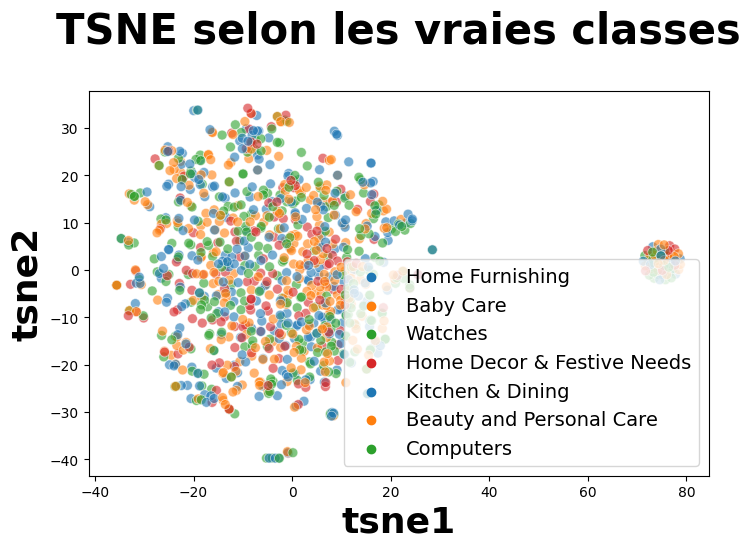

In [74]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

# Analysis of clusters according to actual classes

## Create clusters from TSNE

In [75]:
from sklearn import cluster, metrics

#cls = cluster.KMeans(n_clusters=4, random_state=6)

# we have 7 product categories
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


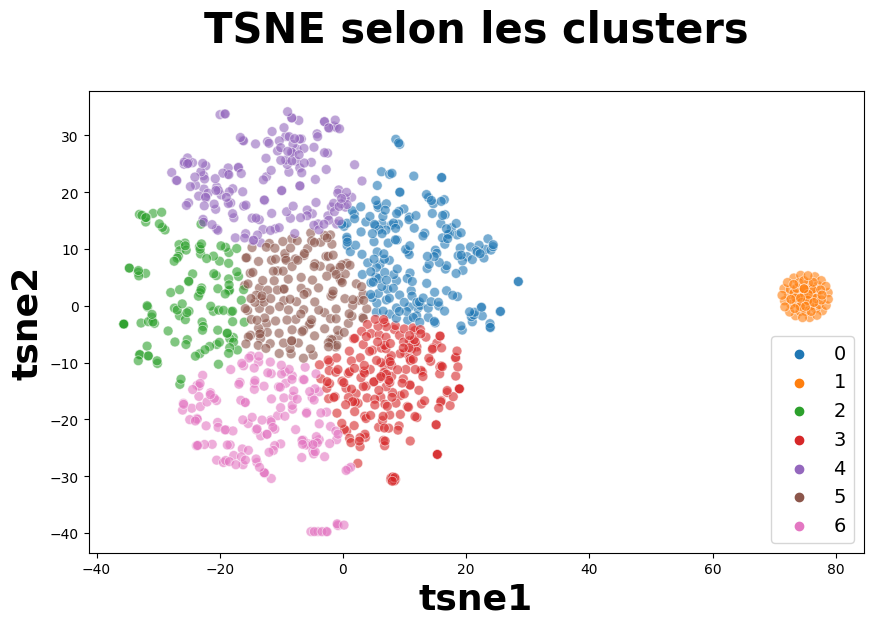

ARI :  -0.0019034152096445887


In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

#labels = data["label"]
labels = df["main_product_category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# Class level analysis

## Confusion matrix

# TODO - REDO : I GET BAD CLUSTERS ABOVE AND CONFUSION MATRIX BELOW SEEMS WRONG

In [79]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    193
1     62
2    118
3    197
4    168
5    157
6    155
Name: class, dtype: int64

In [81]:
# Need to use the same numerical labels
numerical_labels = df["category_id"]

conf_mat = metrics.confusion_matrix(numerical_labels, cls.labels_)
print(conf_mat)

[[29  8 20 32 26 17 18]
 [25  6 14 34 27 20 24]
 [33  8 16 24 26 21 22]
 [33 10 13 25 21 23 25]
 [26 10 18 29 23 25 19]
 [24  8 18 22 21 30 27]
 [23 12 19 31 24 21 20]]


In [84]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    #corresp = [3, 1, 2, 0]
    #print ("Correspondance des clusters : ", corresp)
    
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    #labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    #return labels['y_pred_transform']
    return labels['y_pred']

cls_labels_transform = conf_mat_transform(numerical_labels, cls.labels_)
conf_mat = metrics.confusion_matrix(numerical_labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(numerical_labels, cls_labels_transform))

[[29  8 20 32 26 17 18]
 [25  6 14 34 27 20 24]
 [33  8 16 24 26 21 22]
 [33 10 13 25 21 23 25]
 [26 10 18 29 23 25 19]
 [24  8 18 22 21 30 27]
 [23 12 19 31 24 21 20]]

              precision    recall  f1-score   support

           0       0.15      0.19      0.17       150
           1       0.10      0.04      0.06       150
           2       0.14      0.11      0.12       150
           3       0.13      0.17      0.14       150
           4       0.14      0.15      0.14       150
           5       0.19      0.20      0.20       150
           6       0.13      0.13      0.13       150

    accuracy                           0.14      1050
   macro avg       0.14      0.14      0.14      1050
weighted avg       0.14      0.14      0.14      1050



<Axes: >

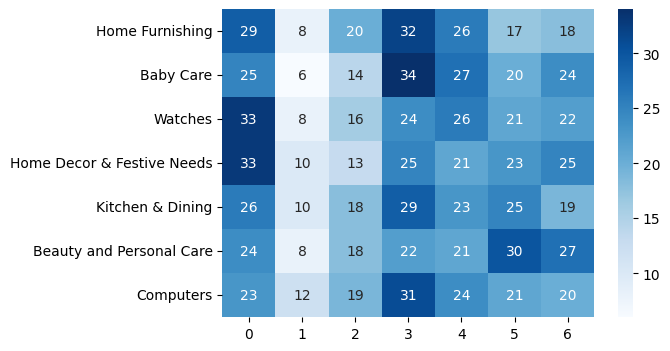

In [85]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])

plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")